# Solve 1D-CSP with SA and FFD
***SamanArzaghi_610398096***

## Import some libraries

In [1]:
import random
from math import exp
import time
from copy import deepcopy
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

## Read data from file

In [2]:
# read from file
def read_data(path):
    '''
        path : the path to the file ( type : string )
    '''
    file = open(path)
    content = file.readlines()
    return [int(s) for s in content[3].split(',')]

## Create initial solution
For the initial solution, we will sort the orders in reverse order and use them.

In [3]:
# create a initial solution
def initial_solution(path, reverse):
    '''
        path : the path to the file ( type : string )
        reverse : sort first solution in reverse order ( type : boolean )
    '''
    # get orders from file
    orders = read_data(path)
    first_order = orders.copy()
    # sort in reverse order
    if reverse:
        first_order.sort(reverse = True)
    return first_order

## calculate VC for each stock
It can be predicted that by considering a virtual cost
and trying to minimize it, we will be able to obtain a
better trim loss concentration by using a local search
algorithm.

The virtual cost which is defined for each stock is a
variable value which has the ascending trend. It is
possible to use the natural series of number with a
linear-ascending trend (from 1 to M) as a virtual cost.

We can calculate VC for all stocks with the below function:

In [4]:
# go on for a order Arrange an order
def calculate_VC(original_order, lenght_object):
    '''
        original_order : give and order ( type : list )
        lenght_object : lenght of the original stock/object ( type : int )
    
    '''
    order = original_order.copy()
    # create a list to save VC for each stock
    objects_map = []
    # use all orders
    while len(order) != 0:
        pattern = []
        pop_list = []
        temp_lenght = lenght_object
        # calculate VC for each stock
        for i in range(len(order)):
            if order[i] <= temp_lenght:
                pattern.append(order[i])
                pop_list.append(i)
                temp_lenght -= order[i]
        # remove used orders
        for i in pop_list[::-1]:
            order.pop(i)
        virtual_cost = lenght_object - sum(pattern)
        # save stock and its VC
        objects_map.append([pattern, virtual_cost])
    return objects_map

## Calculate TVC
Finally the total virtual cost (TVC), will be computed
as below:

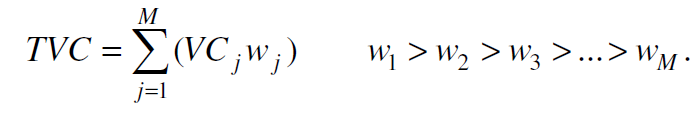

In [5]:
# calculate the TVC
def calculate_TVC(order, lenght_object):
    '''
        order : give and order ( type : list )
        lenght_object : lenght of the original stock/object ( type : int )
    
    '''
    # first caculate VC for each stock
    objects_map = calculate_VC(order, lenght_object)
    virtual_costs = [objects_map[x][1] for x in range(len(objects_map))]
    virtual_costs.sort(reverse=True)
    TVC = 0
    # calculate TVC
    for i in range(len(virtual_costs)):
        TVC += (i+1) * virtual_costs[i]
    return TVC

## Mutation for SA
In order to generate a neighborhood solution, a
random state will be used. In this state, by the use of
random selection, the item orders are changed algorithmically.
The steps of the above algorithm are explained
below:

Step 1. Numerate the available small items in initial
solution from 1 to N.

Step 2. Generate a Uniform Random Number in the
range of [2,N] (R1) which defines the number
of displacement of items.

Step 3. Generate R1 uniform random numbers in the
range of [1,N] (R(i): i=1,…, N) which defines
the displaced items number.

Step 4. If the i th and (i +1)th item have the same
length, avoid displacement, otherwise, displace
the th i and th (i +1) items.

In [6]:
# mutation for simulated annealing
def mutation(original_order):
    '''
            original_order : give and order ( type : list )
    '''
    copy_order = original_order.copy()
    # choose randomly how many order to change
    num_changes = random.randint(2,len(copy_order))
    # choose randomly the orders
    random_gens = random.sample(range(0,len(copy_order)), num_changes)
    # change the orders with next order if they are not the same
    for i in random_gens:
        try:
            if copy_order[i] != copy_order[i + 1]:
                copy_order[i], copy_order[i + 1] = copy_order[i + 1], copy_order[i]
        except:
            if copy_order[i] != copy_order[0]:
                copy_order[i], copy_order[0] = copy_order[0], copy_order[i]
    return copy_order

## Combine FFD + SA
All the algorithm we did before is called FFD, now we can combine it with SA.

After determining the neighborhood solution, the
amount of Boltzman function will be computed as
below.

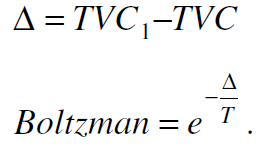

So, the steps of the algorithm are shown below:

Step 1. Generate an initial solution.

Step 2. Calculate the TVC for the initial solution.

Step 3. Generate a neighborhood for initial solution
and calculate the 1 TVC for that.

Step 4. Let D = TVC −TVC
1 .

Step 5. If D < 0 , then 1 TVC = TVC ,go to Step 3.
Else, 1 TVC = TVC with the Boltzman probability.

In [7]:
# combine all + sa
def CSP_FFDSA(path, epoch, temperature, cooling_coefitiont, lenght_object, reverse):
    '''
        path : the path to the file ( type : string )
        epoch : number of iteretion to run the algorithn ( type : int )
        temperature : the initial temperature for simulated annealing ( type : int )
        cooling_coefitiont : the coefitiont for cooling the temperature ( type : float )
        lenght_object : the original lenght of the stock/object ( type : int )
        reverse : sort first solution in reverse order ( type : boolean )
    '''
    start = time.time()
    # save all answers
    global all_answers
    all_answers = []
    t = temperature
    cc = cooling_coefitiont
    first_solution = initial_solution(path, reverse)
    for i in range(epoch):
        t *= cc
        # calculate the TVC of first solution
        first_TVC = calculate_TVC(first_solution, lenght_object)
        # calculate the second answer
        second_solution = mutation(first_solution)
        # calculate the TVC of second answer
        second_TVC = calculate_TVC(second_solution, lenght_object)
        # calculate the delta
        D = second_TVC - first_TVC
        if D < 0 or random.uniform(0, 1) < exp(-D / t):
            first_solution = second_solution
            # save all solution and its TVC and VC
        map_object = calculate_VC(first_solution, lenght_object)
        all_answers.append([map_object, len(map_object)])
        print(f"stock we use: {all_answers[-1][-1]}")
    # in the following code we will convert list of stocks to a single order list *IGNORE IT IF YOU WANT*
    a = all_answers[-1]
    a = a[0]
    b = [a[x][0] for x in range(len(a))]
    flat_list = [item for sublist in b for item in sublist]
    # print runtime and final answer and its cost
    print("Runtime in second:", time.time() - start)
    print(f"stock we use: {all_answers[-1][-1]}")
    print(flat_list)

## Input1

In [8]:
CSP_FFDSA(path='input1.stock', epoch=100, temperature=1, cooling_coefitiont=0.7, lenght_object=1000, reverse=True)

Runtime in second: 0.09075927734375
stock we use: 49
[987, 988, 933, 61, 967, 33, 914, 86, 868, 126, 788, 187, 23, 788, 211, 805, 181, 753, 241, 716, 284, 753, 246, 689, 306, 686, 312, 678, 315, 662, 337, 672, 312, 660, 333, 653, 346, 648, 351, 627, 371, 632, 368, 609, 370, 18, 618, 365, 592, 405, 581, 414, 557, 441, 557, 437, 557, 424, 544, 412, 43, 555, 409, 532, 463, 518, 457, 549, 402, 46, 525, 460, 515, 354, 125, 517, 356, 125, 507, 295, 186, 506, 301, 180, 495, 501, 292, 286, 286, 135, 283, 280, 268, 148, 266, 266, 278, 171, 264, 251, 249, 232, 248, 230, 218, 224, 80, 170, 149, 149, 149, 145, 144, 92, 123, 119, 118, 115, 117, 109, 116, 107, 75, 106, 106, 106, 99, 106, 92, 88, 88, 84, 78, 45, 79, 71, 69, 60, 70, 53]


## Input2

In [9]:
CSP_FFDSA(path='input2.stock', epoch=100, temperature=100, cooling_coefitiont=0.8, lenght_object=5600, reverse=False)

Runtime in second: 0.1735224723815918
stock we use: 78
[2150, 1520, 1880, 1520, 1820, 2150, 2050, 2150, 1380, 1710, 2140, 1380, 2140, 1820, 1520, 2150, 2140, 2150, 1820, 1560, 2050, 1880, 1380, 2100, 1880, 1560, 1710, 1880, 1930, 2050, 2150, 1380, 2140, 1710, 1710, 1820, 2000, 1710, 2150, 1880, 1520, 1930, 2000, 1560, 1930, 2050, 1520, 1820, 2200, 1560, 1930, 1710, 1930, 2050, 2050, 1380, 2100, 1520, 1520, 2000, 2150, 1380, 2000, 2140, 1380, 1880, 2200, 1520, 1560, 2140, 1880, 2050, 1930, 1520, 2000, 2200, 1380, 1930, 1710, 1520, 1710, 2150, 1710, 1820, 2200, 1520, 2100, 2200, 1820, 1880, 1880, 1820, 2140, 1380, 2100, 1930, 1380, 1820, 1880, 1880, 2140, 2050, 1380, 1880, 2000, 1560, 2140, 2150, 2150, 1820, 1520, 1820, 2140, 1560, 2140, 1710, 1710, 2200, 2200, 1880, 2200, 1520, 1930, 2200, 1380, 1820, 2100, 1520, 2100, 2140, 2140, 2050, 1380, 2140, 2200, 2100, 1880, 1380, 1820, 1820, 1930, 2150, 2140, 2100, 2150, 1710, 1380, 2200, 1560, 1520, 1930, 1380, 1380, 1820, 2050, 1930, 1520, 21

## Input3

In [10]:
CSP_FFDSA(path='input3.stock', epoch=50, temperature=100, cooling_coefitiont=0.9, lenght_object=500, reverse=True)

Runtime in second: 0.5386703014373779
stock we use: 92
[405, 90, 5, 479, 21, 361, 134, 5, 458, 41, 1, 403, 96, 1, 433, 67, 421, 72, 7, 470, 27, 3, 411, 87, 2, 369, 128, 3, 430, 68, 2, 364, 133, 3, 386, 111, 3, 331, 169, 343, 153, 4, 360, 138, 2, 339, 159, 2, 321, 178, 1, 359, 139, 2, 335, 161, 4, 419, 75, 6, 315, 183, 2, 314, 186, 299, 199, 2, 399, 98, 3, 350, 147, 3, 318, 172, 10, 314, 174, 12, 280, 209, 11, 313, 187, 313, 184, 3, 314, 174, 12, 275, 225, 311, 189, 319, 170, 11, 298, 196, 6, 314, 169, 17, 264, 214, 22, 290, 209, 1, 277, 213, 10, 282, 201, 17, 265, 234, 1, 288, 205, 7, 274, 225, 1, 279, 198, 23, 271, 229, 275, 224, 1, 263, 234, 3, 263, 228, 9, 264, 224, 12, 281, 204, 14, 1, 245, 251, 4, 260, 239, 1, 245, 255, 243, 243, 14, 271, 227, 2, 243, 250, 7, 245, 244, 11, 255, 240, 5, 237, 204, 50, 9, 191, 188, 116, 5, 170, 170, 152, 8, 180, 166, 154, 167, 197, 133, 3, 163, 178, 156, 3, 167, 167, 162, 4, 160, 158, 165, 17, 152, 152, 157, 36, 3, 159, 152, 153, 32, 4, 152, 147, 151

## Input4

In [11]:
CSP_FFDSA(path='input4.stock', epoch=20, temperature=1000, cooling_coefitiont=0.9, lenght_object=100, reverse=True)

Runtime in second: 0.48569655418395996
stock we use: 205
[93, 1, 6, 93, 7, 89, 11, 92, 8, 90, 10, 91, 9, 80, 20, 95, 5, 91, 9, 92, 8, 99, 1, 88, 12, 87, 13, 98, 2, 87, 13, 80, 20, 89, 11, 78, 22, 89, 11, 79, 21, 84, 16, 80, 20, 81, 19, 76, 24, 79, 21, 80, 20, 73, 27, 74, 26, 78, 22, 81, 19, 82, 18, 74, 26, 74, 26, 75, 25, 74, 26, 69, 31, 71, 29, 74, 26, 73, 27, 68, 32, 73, 27, 72, 28, 71, 29, 71, 29, 66, 34, 72, 28, 68, 32, 69, 31, 72, 28, 66, 34, 67, 33, 73, 27, 70, 30, 66, 34, 67, 33, 68, 32, 67, 33, 67, 33, 65, 35, 67, 33, 68, 32, 63, 37, 65, 35, 65, 35, 62, 38, 61, 38, 1, 65, 35, 61, 38, 1, 66, 34, 61, 39, 62, 38, 60, 40, 62, 38, 59, 41, 61, 39, 63, 37, 59, 40, 1, 59, 41, 57, 43, 60, 40, 58, 42, 59, 39, 2, 56, 44, 58, 39, 3, 57, 43, 56, 44, 58, 38, 4, 58, 38, 4, 59, 37, 4, 56, 44, 56, 44, 56, 44, 52, 48, 52, 48, 56, 44, 54, 46, 54, 46, 54, 46, 54, 46, 55, 45, 56, 44, 52, 47, 1, 51, 47, 2, 52, 48, 55, 45, 51, 47, 2, 50, 50, 52, 47, 1, 54, 46, 51, 47, 2, 54, 45, 1, 51, 47, 2, 50, 50,

## Input5

In [9]:
CSP_FFDSA(path='input5.stock', epoch=100, temperature=1000, cooling_coefitiont=0.99, lenght_object=681, reverse=False)

stock we use: 3849
stock we use: 3849
stock we use: 3849


KeyboardInterrupt: 